In [1]:
##step one is importing the necessary libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
##import the data set to jupyternotebook
car=pd.read_csv("car data.csv")

In [3]:
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
# Display information about the dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Check for missing values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
#check for description of the data
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car.head

<bound method NDFrame.head of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1  

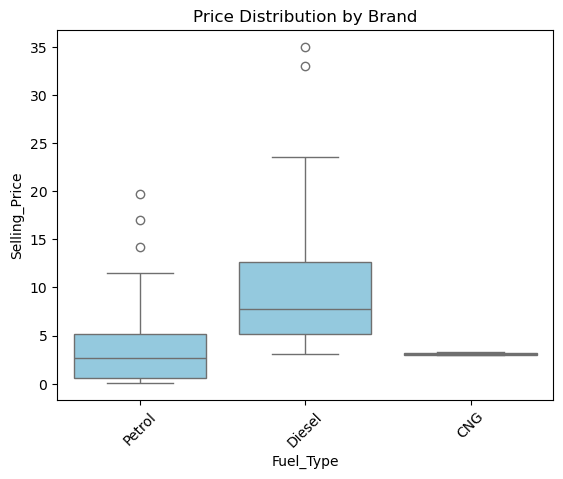

In [8]:
#EXPLORATORY DATA ANALYSIS
#Analyze the dataset to understand relationships between features and the target variable.
# Analyze categorical variables based on countious variable
sn.boxplot(x='Fuel_Type', y='Selling_Price', data=car,color="skyblue")
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand')
plt.show()

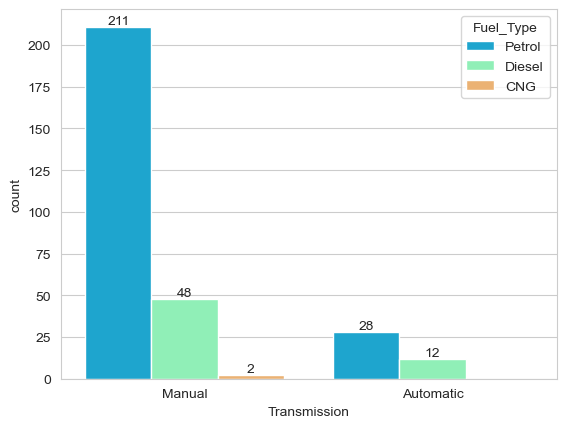

In [9]:
#check transmission based on the fuel type
#using a barplot
sn.set_style("whitegrid")
TF=sn.countplot(x="Transmission",hue="Fuel_Type",data=car,palette="rainbow")
for bars in TF.containers:
    TF.bar_label(bars)
plt.show()

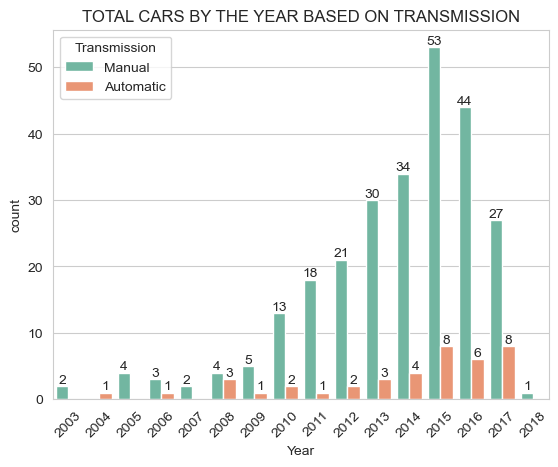

In [10]:
#check Selling_Price against year based on transmission
sn.set_style("whitegrid")
ty=sn.countplot(x="Year",hue="Transmission",data=car,palette="Set2")
plt.xticks(rotation=45)
for bars in ty.containers:
    ty.bar_label(bars)
plt.title("TOTAL CARS BY THE YEAR BASED ON TRANSMISSION")
plt.show()S

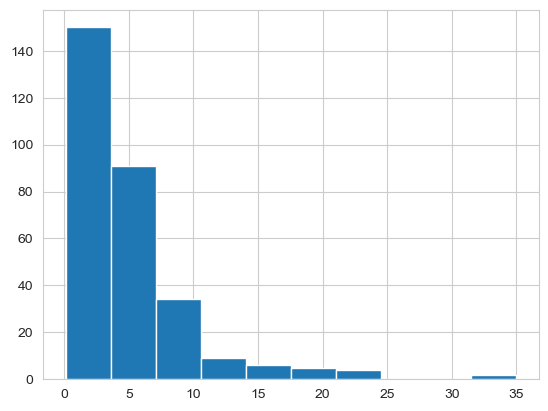

In [11]:
#CHECK FOR DISTRIBUTION OF VALUES BASED ON COUNTIOUS VARIABLES
plt.hist(car["Selling_Price"])
plt.show()

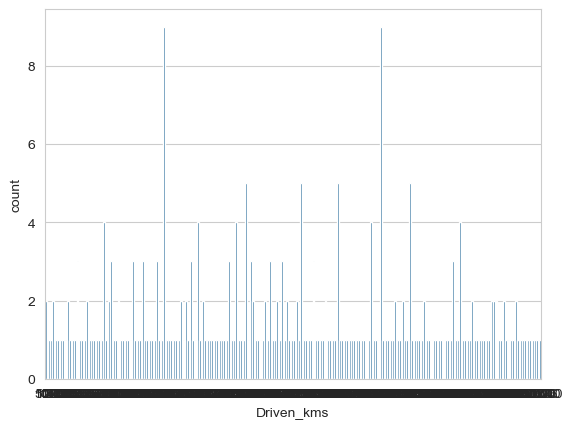

In [12]:
#check driven kms based on Transmission
sn.set_style("whitegrid")
sn.countplot(x="Driven_kms",data=car)
plt.show()

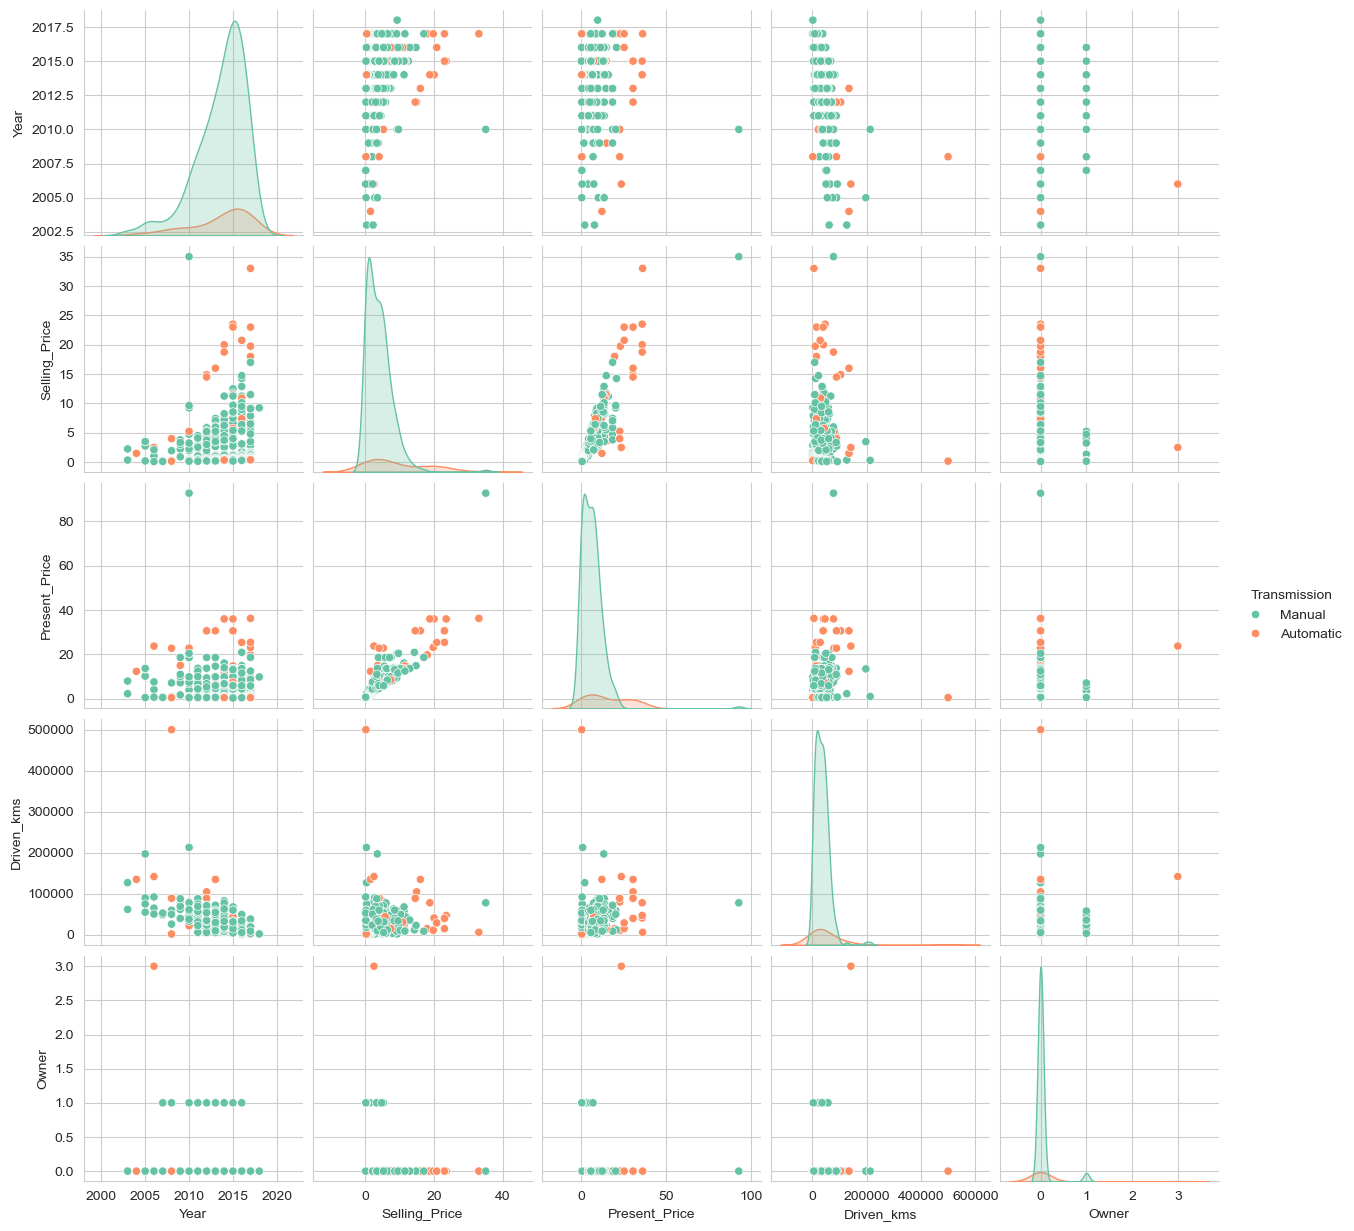

In [13]:
# Pairplot to visualize feature relationships
sn.pairplot(car, hue='Transmission', palette='Set2')
plt.show()

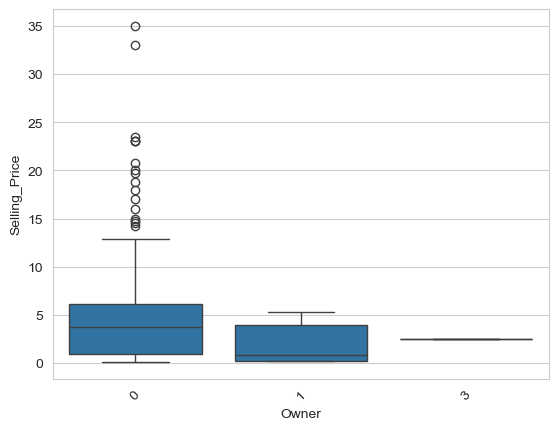

In [14]:
sn.boxplot(x='Owner', y='Selling_Price', data=car)
plt.xticks(rotation=45)
plt.show()

In [15]:
##some categorical values should be converted to numerical e.g manual=1 automatic=2 for machine to understand
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables (if any)
label_encoder = LabelEncoder()
for column in car.select_dtypes(include='object').columns:
    car[column] = label_encoder.fit_transform(car[column])

In [16]:
# Train-Test Split
# Define Features and Target
# Drop the target column from the dataset
X =car.drop(columns=['Selling_Price'])
# Define the target column
y = car['Selling_Price'] 

In [17]:
#Use train_test_split() from Scikit-learn to divide the data
from sklearn.model_selection import train_test_split

In [18]:
#80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#normalize the range of driven kms using StandardScaler.
#first import necessary machine learning
from sklearn.preprocessing import StandardScaler

In [20]:
#Check the shape of the training and testing datasets to ensure the split is correct.
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (240, 8)
Testing Features Shape: (61, 8)
Training Target Shape: (240,)
Testing Target Shape: (61,)


In [21]:
##Model Training
# i will use regression models since the task involves predicting a continuous variable
#Train the Models
#Import the required libraries
from sklearn.linear_model import LinearRegression

In [22]:
# Initialize the model
linear_model = LinearRegression()

In [23]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict on test data
y_pred = linear_model.predict(X_test)

In [25]:
y_pred

array([ 2.97491895,  8.32612847,  6.0161235 , -1.38172371,  9.27940633,
        7.06928951,  1.30824607,  0.74154082,  1.38400041,  7.12180339,
        8.69584861,  0.54647028,  8.53755625,  3.52559619,  6.461831  ,
        3.03854609,  0.42667599, 10.91368809,  1.74417072,  2.29195225,
        0.37662088,  7.76798131,  6.17213021,  2.60498874,  0.84816117,
        3.69954086,  5.35530228,  2.8301809 ,  2.11511377,  1.72142608,
        0.42317787,  8.82614032, -0.60965683,  2.2555362 ,  8.22536901,
        4.57720813,  7.36810266,  7.71076849,  2.85141326,  8.10873551,
        3.98313701,  4.3789598 ,  4.40312603,  0.55049612,  6.91084914,
        0.46147134,  7.43952702, 11.46949761,  3.12745561,  4.9423416 ,
        6.81243382,  2.15400554, 20.55225973, 16.78374986,  7.09182007,
        9.8550337 ,  4.48118171,  8.65492286,  1.84936153,  7.64066408,
        0.21224031])

In [26]:
#Evaluate the Model
#import libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
#Measures the average absolute difference between the predicted and actual values.
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 1.214732989654124


In [31]:
#Measures the average squared difference between the predicted and actual values.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 3.537020423744298


In [32]:
#Measures how well the model explains the variance in the target variable.
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.8464540623821022


In [ ]:
#These results suggest that the model explains about 85% of the variance in the selling price. The errors are relatively low, indicating a good fit.

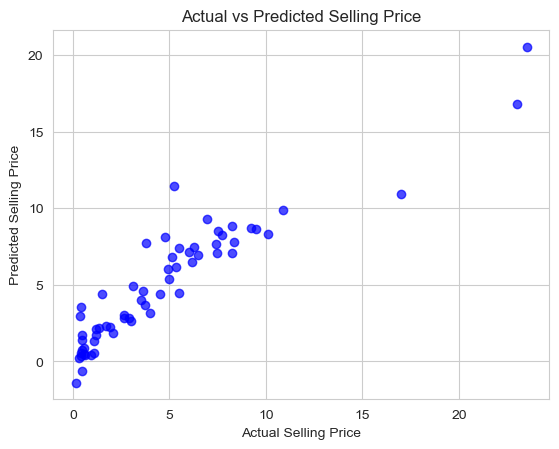

In [33]:
#Visualize Results
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()